<a href="https://colab.research.google.com/github/pravash21/image-compare/blob/master/compare-image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade imutils

Requirement already up-to-date: imutils in /usr/local/lib/python3.6/dist-packages (0.5.2)


In [0]:
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np
import cv2
import argparse
import imutils
from google.colab.patches import cv2_imshow

In [0]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
 
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = measure.compare_ssim(imageA, imageB)
 
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
 
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the images
	plt.show()

In [4]:
from google.colab import files
uploaded = files.upload()

Saving kurta4.jpg to kurta4.jpg


In [5]:
from google.colab import files
uploaded = files.upload()

Saving kurta3.jpg to kurta3.jpg


In [0]:
original = cv2.imread("kurta4.jpg")
another = cv2.imread("kurta3.jpg")

img1=original
img2=another
# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
another = cv2.cvtColor(another, cv2.COLOR_BGR2GRAY)

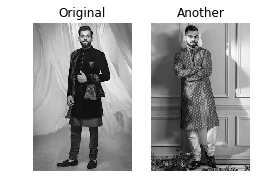

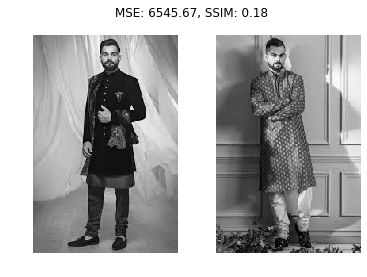

In [7]:
fig = plt.figure("Images")
images = ("Original", original), ("Another", another)
 

for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")

plt.show()
 
# compare the images
compare_images(original, another, "Original vs. Another")

In [8]:
(score, diff) = measure.compare_ssim(original, another, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.18180043124099407


In [0]:
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

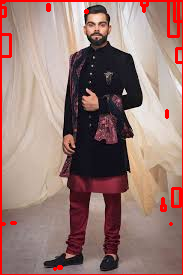

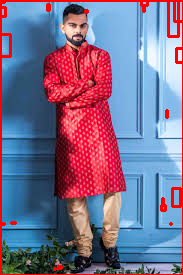

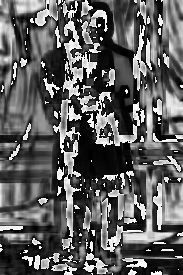

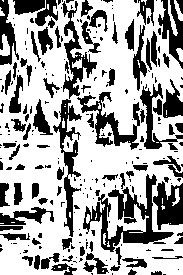

-1

In [10]:
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
# show the output images
cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(diff)
cv2_imshow(thresh)
cv2.waitKey(0)